**Пакеты прикладных программ**

*Задача о поиске места для офиса*

Имеется фирма, которая занимается ремонтом оборудования. Клиенты этой фирмы располагаются в разных частях г. Москвы, и, возможно, в других городах России. Каждое взаимодействие фирмы с клиентом заключается в выезде бригады на адрес клиенты, что приводит к затратам фирмы, пропорциональным расстоянию от офиса этой фирмы до места положения клиента. В один прекрасный день Вы (как потенциальный генеральный директор фирмы) решаете поменять положение Вашего офиса с целью минимизации издержек. При этом предполагается, что стоимость аренды офиса, его содержания и т.п. почти постоянна (не зависит от его положения), а издержки связаны исключительно с необходимостью выезжать к клиентам.

В качестве исходных данных необходимо использовать некоторый текстовый файл с координатами клиентов (для каждого клиента в отдельной строке указаны широта и долгота его положения, через запятую). Широта и долгота задаются как вещественные числа, в градусах (без выделения минут и секунд); символ-разделитель - "точка".

Основная задача состоит в разработке алгоритма поиска оптимального положения офиса. При этом необходимо рассмотреть несколько разных постановок задачи:
1. Все клиенты равнозначны и могут затребовать услуги фирмы с одинаковой вероятностью. Можно считать, что Земля является "плоской", так как расстояния между разными клиентами невелики. В качестве расстояния от офиса до клиента можно использовать расстояние по прямой.
2. Все клиенты равнозначны и могут затребовать услуги фирмы с одинаковой вероятностью. Поскольку расстояния до клиентов большие (это могут быть точки в разных городах РФ), то при расчётах необходимо учитывать эллиптическую модель Земли. В качестве расстояния от офиса до клиента необходимо учитывать длину кратчайшего пути по поверхности эллипсоида.
3. Клиенты неравнозначны и могут затребовать услуги фирмы с разными вероятностями. В файле с информацией о клиентах для каждой строки ($i$-ого клиента) кроме широты и долготы указывается приоритет - некоторое положительное число (чем больше число, тем чаще этому клиенты требуются услуги Вашей фирмы). Как и в первом пункте, можно считать, что Земля "плоская". В качестве расстояния от офиса до клиента можно использовать расстояние по прямой.

Для каждого варианта задачи необходимо придумать постановку соответствующей математической задачи оптимизации и алгоритм численного решения этой задачи. Результатом выполнения работы являются программа и краткий отчёт.

Программа должна выдавать оптимальные координаты положения офиса..м численного решения этой зь оптимальные координаты положения офисаановок задачи:

**Первый случай**

Будем считать, что во входном файле даны декартовы координаты точек на плоскости, т.е. $C_i = (x_i, y_i), i=1,2,\dots, N.$ Здесь $N$ ~--~ количество клиентов.
Требуется найти положение офиса, т.е. точку с коодинатами $O = (x_0,y_0).$ Расстояние между $i$-м клиентом и офисом равно $\rho(C_i, O) = \sqrt{(x_i - x_0)^2 + (y_i - y_0)^2}.$ Издержки фирмы пропорциональны этому расстоянию, т.е. равны $k\rho(C_i, O).$ Требуется минимизировать издержки фирмы, т.е. следующую сумму:
$$
\sum\limits_{i=1}^N k \rho(C_i, O) = k \sum\limits_{i=1}^N \rho(C_i, O) = k \sum\limits_{i=1}^N \sqrt{(x_i - x_0)^2 + (y_i - y_0)^2} \rightarrow \min_{(x_0,y_0) \in \mathbb{R}^2}
$$

Поскольку $k$ присутствует здесь в качестве множителя, то его можно опустить и минимизировать сумму расстояний. Тогда минимизируемый функционал равен 
$$
\mathcal{J} = \sum\limits_{i=1}^N \sqrt{(x_i - x_0)^2 + (y_i - y_0)^2} \rightarrow \min_{(x_0,y_0) \in \mathbb{R}^2}
$$

Данная задача известна как задача поиска геометрического центра многоугольника. Точно можно посчитать решение для трех и двух точек, существует численный алгоритм(Weiszfeld), которым мы воспользуемся.

Формула для итерационного метода следующая:

$$
(x_0^{t+1}, y_0^{t+1}) = \dfrac{\sum\limits_{i = 1}^N \dfrac{1}{\rho((x^t_0, y^t_0), (x_i, y_i))} (x_i, y_i)}{\sum\limits_{i = 1}^N \dfrac{1}{\rho((x^t_0, y^t_0), (x_i, y_i))}}
$$

В качестве начального приближения будем брать среднее всех точек.

Данный метод может "застревать" в уже имеющихся точках, так что их можно проверить отдельно, а потом слегка отклоняться от заданных точек, если попали в ее малую окрестность.


In [59]:
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

%matplotlib widget


In [60]:
def rho(x, y, axis=-1):
    if axis == -1:
        return np.linalg.norm(x - y)
    else:
        return np.linalg.norm(x - y, axis=axis)

In [159]:
class Solution:
    def __init__(self, rho, filename, case_num):
        self.case_num = case_num
        self.filename = filename
        self.rho = rho
        self.n = 1000
        self.eps = 1e-6
        self.delta = 1e-4
        self.ans_point = None
        self.ans = None
        self.hist_points = None
        self.hist_ans = None
        self.X, self.weights = self.data_execution(filename, case_num)

    def data_execution(self, filename, case_num):
        data = np.loadtxt(filename, delimiter=',')
        if data.shape[0] == 0:
            raise Exception('Пустой файл')
        if data.shape[1] != 2 and case_num in [1, 2]:
            raise Exception('Неверный формат ввода. Должно быть 2 столбца.')
        elif data.shape[1] != 3 and case_num == 3:
            raise Exception('Неверный формат ввода. Должно быть 3 столбца.')
        if np.any(np.isnan(data)):
            raise Exception('Неверный формат ввода. Должно быть 2 столбца.')
        if case_num in [1, 2]:
            return data, np.ones((data.shape[0], 1)).T
        return data[:, 0:2], data[:, 2].T/ np.sum(data[:, 2])
        
    def calculate_weights(self, y):
        w = self.rho(self.X, y, axis=1).reshape(-1)
        return self.weights.reshape(-1) * w / np.sum(w)
        
    def check_proximity(self, y):
        while np.any(np.linalg.norm(self.X - y, axis=1) < self.delta):
            y +=0.1*np.ones(len(y))
        return y
        #if np.any(self.rho(self.X, y, axis=1) < self.delta):
        #    idx = np.where(self.rho(self.X, y, axis=1) < self.delta)
        #    print(f'changing from {y}')
        #    y = y + self.delta * (y - self.X[idx]) / self.rho(self.X[idx], y)
        #    print(f'changing to {y}')
        #return y
        
    def J(self, y):
        return np.sum(self.rho(self.X, y, axis=1))
        
    def solve(self):
        curr_point = np.mean(self.X, axis=0)
        hist_points = []
        hist_ans = []
        ans = np.inf
        ans_point = self.X[0]
        for i in range(self.X.shape[0]):
            new_ans = self.J(self.X[i])
            if new_ans < ans:
                ans_point, ans = self.X[i], new_ans
                hist_points.append(self.X[i])
                hist_ans.append(new_ans)
        iter_count = 0
        while iter_count < self.n:
            hist_points.append(curr_point)
            new_ans = self.J(curr_point)
            hist_ans.append(new_ans)
            if abs(new_ans - ans) < self.eps:
                print(f'Алгоритм завершен по достижению заданной точности\nНайденное решение: {ans_point}\nзначение функционала:{ans}\nЧисло итераций:{iter_count}')
                self.ans_point = ans_point
                self.ans = ans
                self.hist_points = hist_points
                self.hist_ans = hist_ans
                return
            if new_ans < ans:
                ans_point = curr_point
                ans = new_ans
            weights = self.calculate_weights(curr_point)
            curr_point = weights @ self.X
            curr_point = self.check_proximity(curr_point)
            iter_count += 1
        print(f'Алгоритм завершен по достижению максимально допустимого числа итераций\nНайденное решение: {ans_point}\nзначение функционала:{ans}\nЧисло итераций:{iter_count}')
        self.ans_point = ans_point
        self.ans = ans
        self.hist_points = hist_points
        self.hist_ans = hist_ans

    def __str__(self):
        plt.close('all')
        fig1 = plt.figure()
        plt.plot(self.hist_ans)
        plt.title('История значений функционала')
        plt.xlabel('Номер точки')
        plt.ylabel('$\\mathcal{J}(x,y)$')
        plt.show()
        
        h = np.array(self.hist_points)            
        if self.case_num in [1, 3]:
            fig2 = plt.figure()
            plt.scatter(self.X.T[0], self.X.T[1], c='b')
            plt.scatter(h.T[0], h.T[1], c='r')
            plt.scatter(self.ans_point[0], self.ans_point[1], c='k')
            plt.title('Конфигурация системы')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend(['Клиенты', 'Точки на каждой итерации', 'Итоговый минимизатор'], loc='lower right')
            plt.show()
        else:
            fig2, ax = plt.subplots(subplot_kw={"projection": "3d"})
            phi = np.linspace(0, 2 * np.pi, 50)
            theta = np.linspace(-np.pi/2, np.pi/2, 50)
            phi, theta = np.meshgrid(phi, theta)
            x = np.cos(theta) * np.cos(phi)
            y = np.cos(theta) * np.sin(phi)
            z = np.sin(theta)
            ax.plot_surface(x, y, z, color='k', alpha=0.3)
            coords = np.divide(self.X, [180, 360]) * np.pi
            x = np.cos(coords[:, 0]) * np.cos(coords[:, 1])
            y = np.cos(coords[:, 0]) * np.sin(coords[:, 1])
            z = np.sin(coords[:, 0])
            ax.scatter(x, y, z, color='blue')
            x = np.cos(h[:, 0]) * np.cos(h[:, 1])
            y = np.cos(h[:, 0]) * np.sin(h[:, 1])
            z = np.sin(h[:, 0])
            ax.scatter(x, y, z, color='red')
            x = np.cos(self.ans_point[0]) * np.cos(self.ans_point[1])
            y = np.cos(self.ans_point[0]) * np.sin(self.ans_point[1])
            z = np.sin(self.ans_point[0])
            ax.scatter(x,y,z, color='k')
            ax.set_aspect('equal')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Конфигурация системы')
            plt.legend(['Эллипсоид Земли', 'Клиенты', 'Точки на каждой итерации', 'Итоговый минимизатор'])
            
        x = np.linspace(min(self.X.T[0]), max(self.X.T[0]), 100)
        y = np.linspace(min(self.X.T[1]), max(self.X.T[1]), 100)
        X, Y = np.meshgrid(x, y)
        fig3, ax = plt.subplots(subplot_kw={"projection": "3d"})
        Z = np.zeros(X.shape)
        for i in range(Z.shape[0]):
            for j in range(Z.shape[1]):
                Z[i][j] = self.J([X[i][j], Y[i][j]])
        ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, color='blue', alpha=0.6)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('$\\mathcal{J}(x,y)$')
        ax.scatter(h.T[0], h.T[1], self.hist_ans, c='r', alpha=0.6)
        ax.view_init(15, 20)
        ax.set_title('Значения функционала')
        ax.scatter(self.ans_point[0], self.ans_point[1], self.ans, c='black')
        plt.legend(['Поверхность значений функционала', 'Точки на каждой итерации метода', 'Итоговый минимизатор'])
        plt.show()
        
        return f'Найденное решение: {self.ans_point}\nзначение функционала:{self.ans}'
    

Посмотрим на примеры применения алгоритма.

In [169]:
def generate_file(filename, m, loc, scale):
    x = np.random.normal(loc=loc, scale=scale, size=(m, 2))
    np.savetxt(filename, x, fmt='%f, %f')

In [170]:
generate_file('input1.txt', 200, 3, 8)

In [171]:
s = Solution(rho, 'input1.txt', 1)
s.solve()

Алгоритм завершен по достижению максимально допустимого числа итераций
Найденное решение: [3.43892316 3.33782868]
значение функционала:1945.389817470627
Число итераций:1000


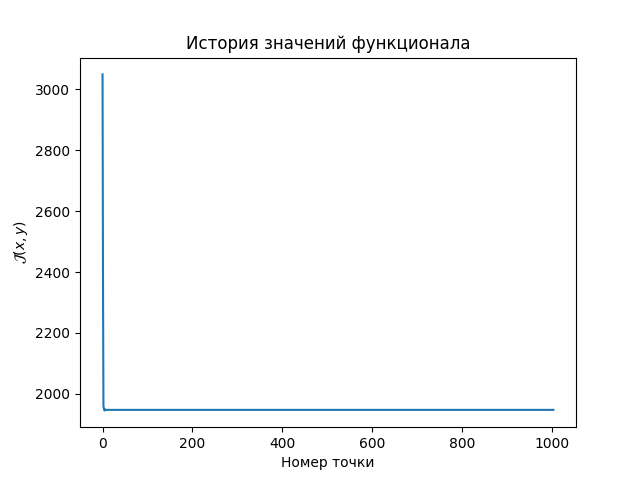

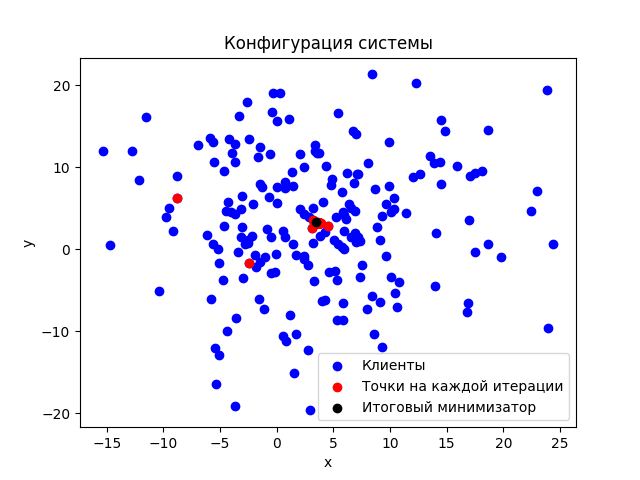

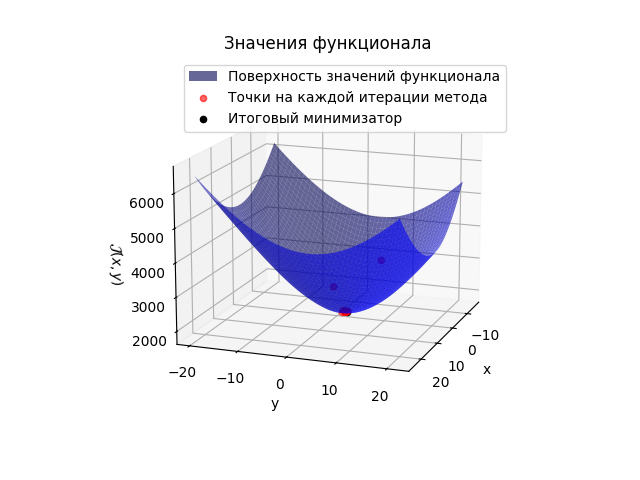

Найденное решение: [3.43892316 3.33782868]
значение функционала:1945.389817470627


In [172]:
print(s)

In [73]:
def generate_file_uniform(filename, a, b, c, d, size):
    x = np.random.uniform(low=a, high=b, size=size)
    y = np.random.uniform(low=c, high=d, size=size)
    np.savetxt(filename, np.array([x,y]).T, fmt='%f, %f')
        

In [75]:
generate_file_uniform('input2.txt', -30, 30, 0, 60, 250)

In [140]:
s = Solution(rho, 'input2.txt', 1)

In [141]:
s.solve()

Алгоритм завершен по достижению максимально допустимого числа итераций
Найденное решение: [ 0.27966004 30.48861912]
значение функционала:5755.440951844672
Число итераций:1000


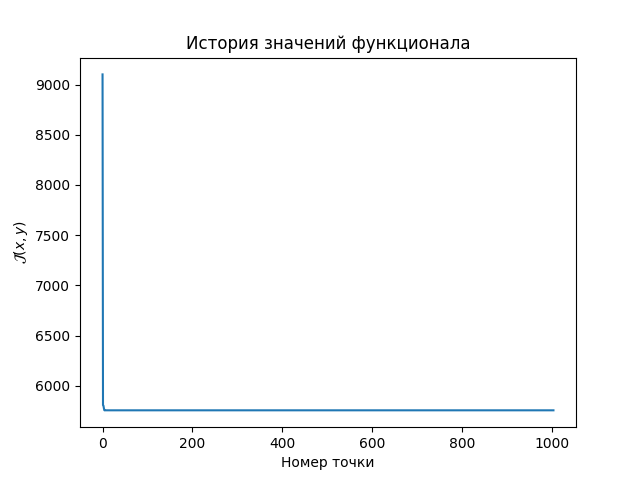

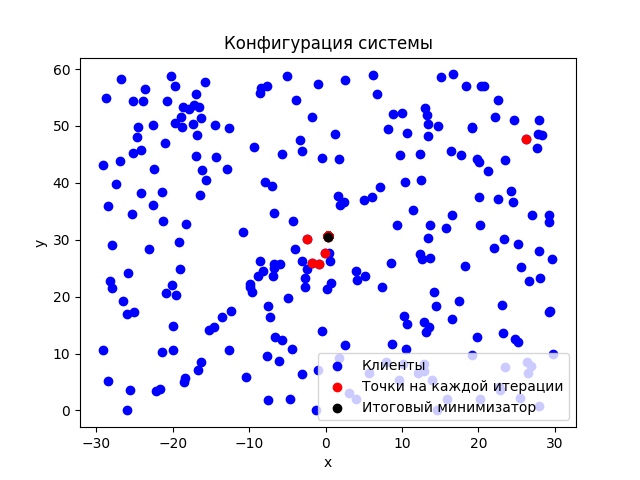

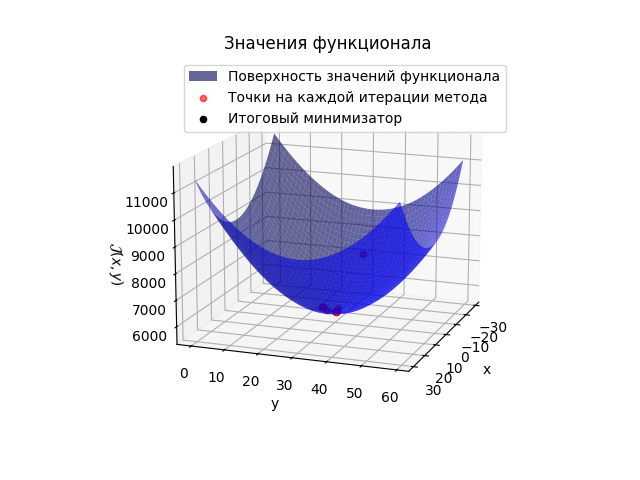

Найденное решение: [ 0.27966004 30.48861912]
значение функционала:5755.440951844672


In [142]:
print(s)

In [143]:
def generate_specific_case(filename):
    x = np.linspace(0, 10, 100)
    y = 2 * x + 3
    np.savetxt(filename, np.array([x,y]).T, fmt='%f, %f')

In [144]:
generate_specific_case('input_specific.txt')

In [145]:
s = Solution(rho, 'input_specific.txt', 1)
s.solve()

Алгоритм завершен по достижению заданной точности
Найденное решение: [ 4.949495 12.89899 ]
значение функционала:564.6636339794026
Число итераций:0


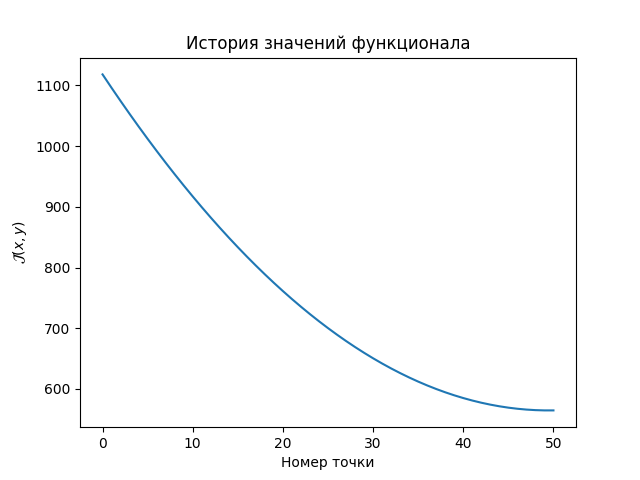

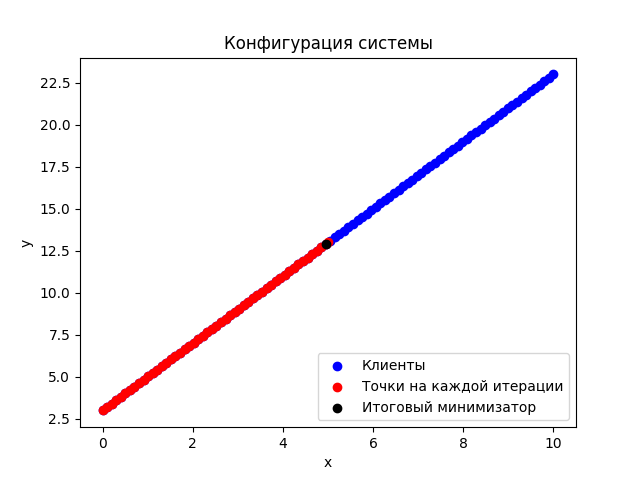

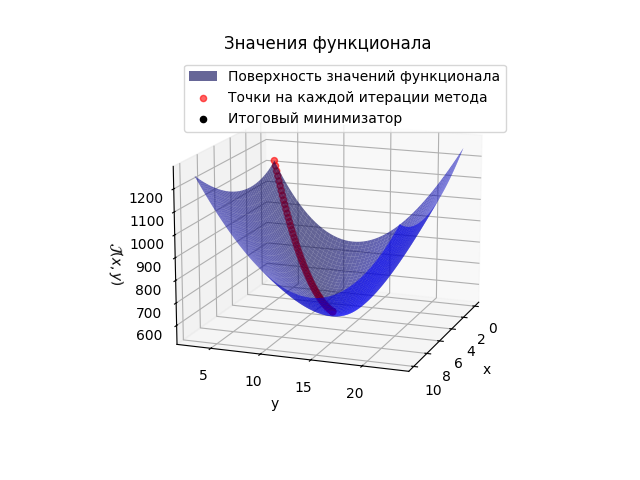

Найденное решение: [ 4.949495 12.89899 ]
значение функционала:564.6636339794026


In [147]:
print(s)

**Третий случай**

Постановка задачи такая же, что и в первом случае, но минимизируемый функционал будет равен 
$$
\mathcal{J}(x_0,y_0) = \sum\limits_{i=1}^N w_i \sqrt{(x_i-x_0)^2 + (y_i-y_0)^2}.
$$

Здесь $w_i$ ~--~ весовые множители, вычисляемые по следующей формуле
$$w_i = \dfrac{p_i}{\sum\limits_{k=1}^{N}p_k}.$$

Здесь $p_i$ ~--~ вероятность запроса услуги $i$-м клиентом.

Численный метод практически ничем не отличается от первого случая. Единственное отличие ~--~ в формуле расчета множителя у точек $(x_i, y_i).$ На $(t+1)$-м шаге приближение будет следующим

$$
(x_0^{t+1}, y_0^{t+1}) = \dfrac{\sum\limits_{i = 1}^N \dfrac{w_i}{\rho((x^t_0, y^t_0), (x_i, y_i))} (x_i, y_i)}{\sum\limits_{i = 1}^N \dfrac{w_i}{\rho((x^t_0, y^t_0), (x_i, y_i))}}.
$$

Программная реализация такая же, как и в первом случае.



In [111]:
def generate_file_third(filename, a, b, c, d, size):
    x = np.random.uniform(a, b, size=size)
    y = np.random.uniform(c, d, size=size)
    weights = np.random.rand(size)
    np.savetxt(filename, np.array([x, y, weights]).T, fmt='%f, %f, %f')

In [112]:
generate_file_third('input3.txt', -30, 30, 0, 60, 100)

In [148]:
s = Solution(rho, 'input3.txt', 3)
s.solve()

Алгоритм завершен по достижению максимально допустимого числа итераций
Найденное решение: [-2.30124374 34.94707534]
значение функционала:2145.0202502719408
Число итераций:1000


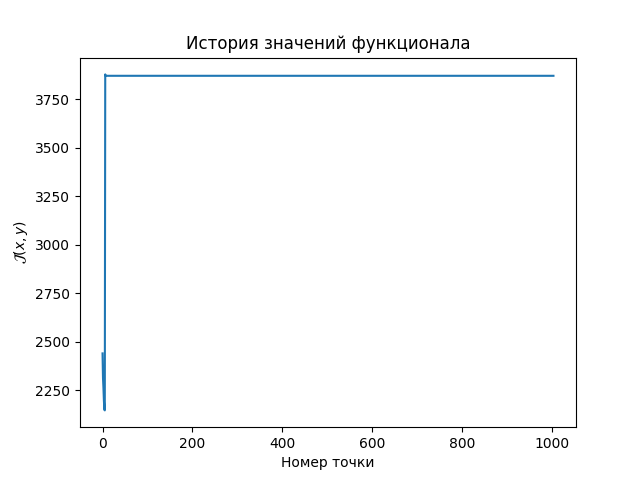

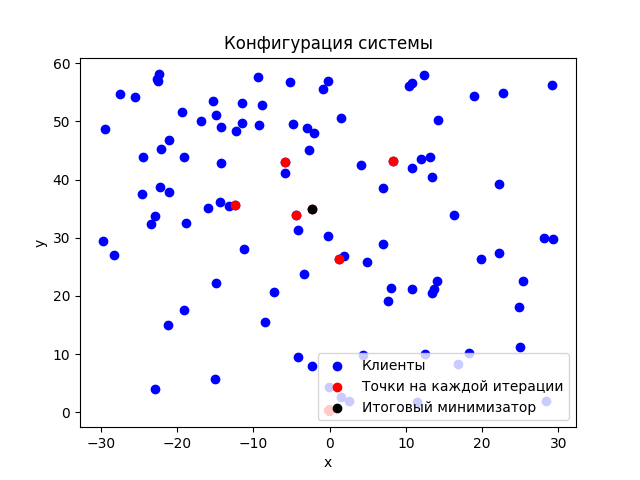

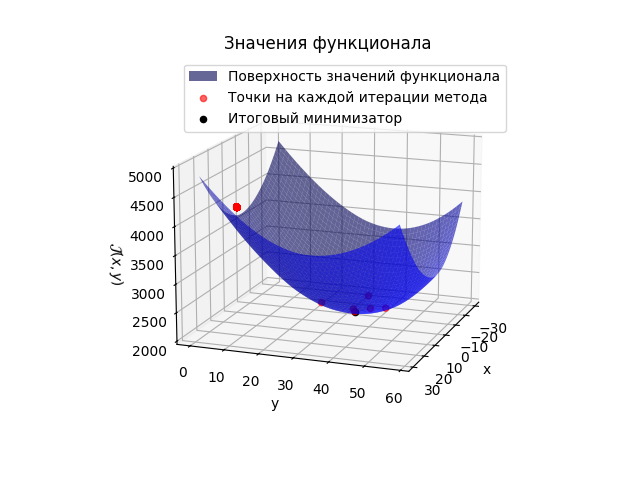

Найденное решение: [-2.30124374 34.94707534]
значение функционала:2145.0202502719408


In [150]:
print(s)

Этот пример показывает, что минимальное значение функционала может достигаться вблизи одной из заданных точек.

**Второй случай**

Алгоритм, примененный в первом случае также будет работать, только теперь необходимо минимизировать сумму расстояний по эллипсоиду. Библиотека geopy предоставляет средства для вычисления расстояния по эллипсоиду Земли.

In [158]:
from geopy.distance import distance as distance
def geodist(X, y, axis=-1):
    if axis == -1:
        return distance(X[i], y).km
    D = np.zeros(X.shape[0])
    for i in range(len(X)):
        D[i] = distance(X[i], y).km
    return D

In [153]:
generate_file_uniform('input4.txt', -90, 90, 0, 360, 100)

In [160]:
s = Solution(geodist, 'input4.txt', 2)

In [161]:
s.solve()

Алгоритм завершен по достижению максимально допустимого числа итераций
Найденное решение: [68.118428 91.824333]
значение функционала:879886.8963512676
Число итераций:1000


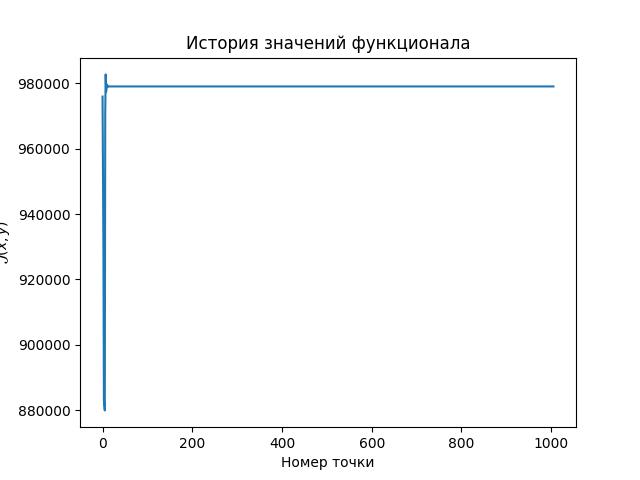

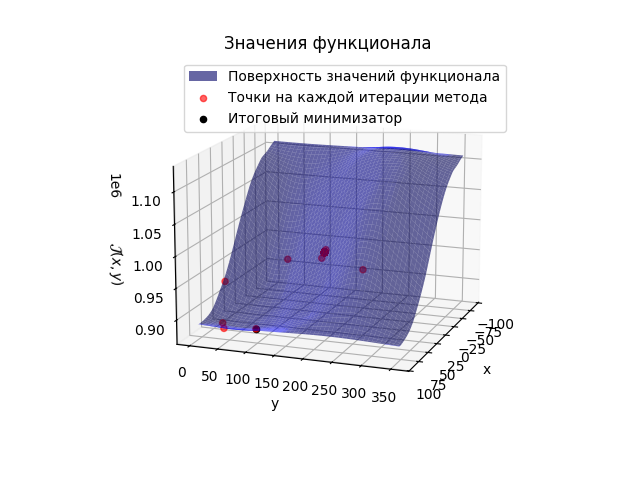

Найденное решение: [68.118428 91.824333]
значение функционала:879886.8963512676


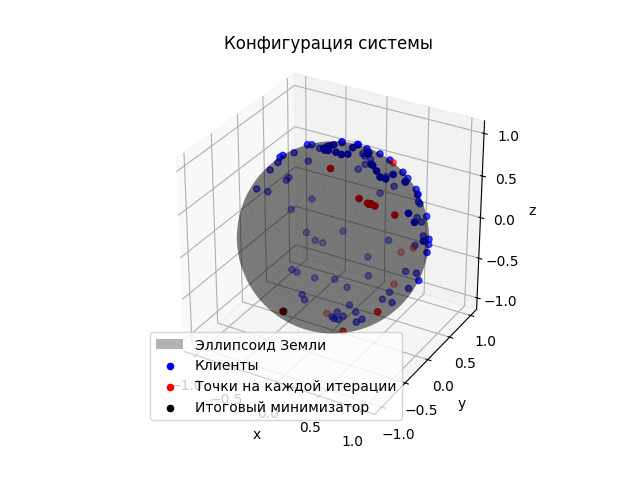

In [162]:
print(s)